<a href="https://colab.research.google.com/github/edineim/machine_learning/blob/main/L12_decision_trees_1_(pr%C3%A1tica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Máquina/Atividades/EX-L05_manual-pipeline/date.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Nascimento,MP,Gols,Assis.,G-PB,PB,PT,CrtsA,CrtV,Pos.
0,1,1990,29,8,7,8,0,1,7,1,AT
1,2,1993,28,12,5,10,2,2,3,0,AT
2,3,1996,28,8,8,8,0,0,3,0,AT
3,4,1991,28,6,3,5,1,1,9,2,AT
4,5,1990,28,8,2,5,3,3,4,0,AT


In [ ]:
d = {'G': 0,'ZG': 1,'LT': 2,'LT,AT': 3,'AT': 4,'AT,LT': 5}

df['Pos.'] = df['Pos.'].map(d)

X = df.iloc[:, 1:10].values

y = df['Pos.'].values

X = df.iloc[:, :2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


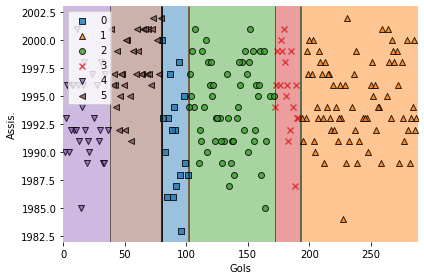

In [ ]:
plot_decision_regions(X_train, y_train, dt_model)

plt.xlabel('Gols')
plt.ylabel('Assis.')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9655172413793104

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


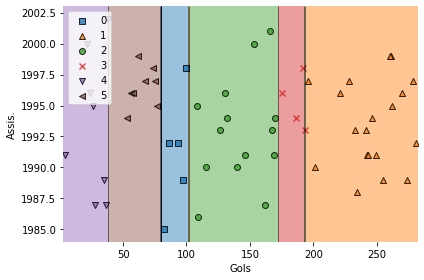

In [ ]:
plot_decision_regions(X_test, y_test, dt_model)

plt.xlabel('Gols')
plt.ylabel('Assis.')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

IndexError: ignored

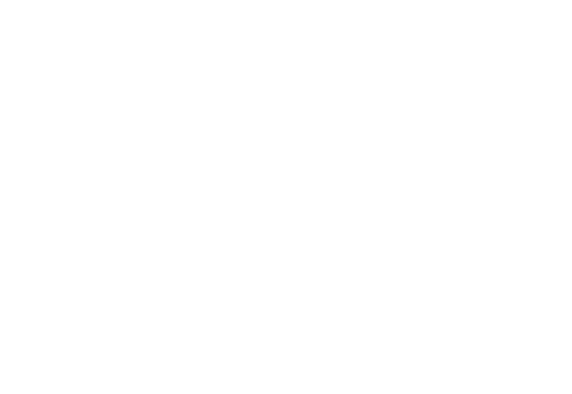

In [ ]:
plt.figure(figsize=(10, 7))

plot_tree(dt_model, filled=True, rounded=True,
          class_names=['G', 
                       'ZG',
                       'LT'],
          feature_names=['Gols', 
                         'Assis.']) 
plt.show()

In [ ]:
X_test1 = X_test[1,:]
y_test1 = y_test[1]

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

In [ ]:
y_test1_pred  = dt_model.predict(X_test1)

y_test1_pred

array([0])

In [ ]:
accuracy_score(y_test1, y_test1_pred)

1.0

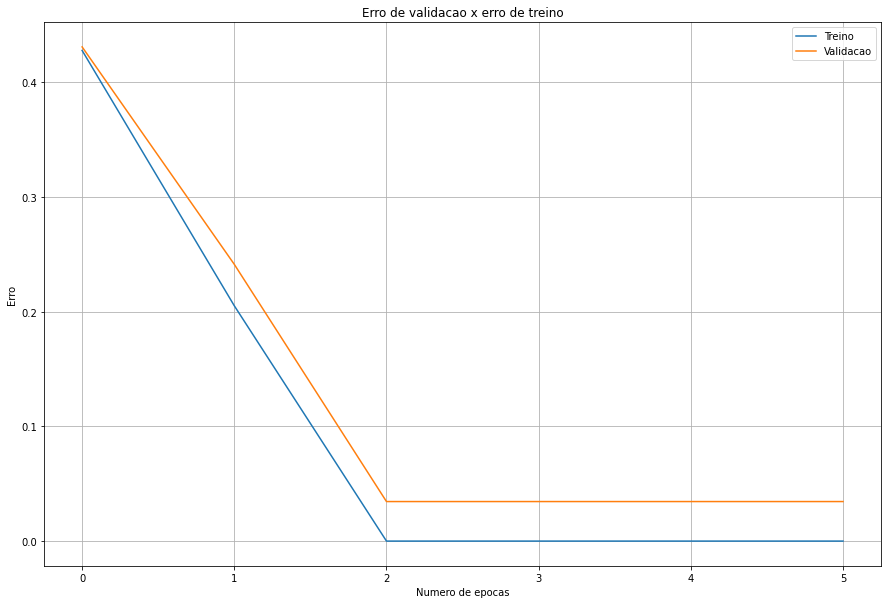

In [ ]:
training, testing = [], []

for i in range(1,7):
  dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state = 65)
  dt_model.fit(X_train, y_train)
  training.append(1 - dt_model.score(X_train, y_train))
  testing.append(1 - dt_model.score(X_test, y_test))


plt.figure(figsize=(15,10))
plt.title("Erro de validacao x erro de treino")
plt.xlabel("Numero de epocas")
plt.ylabel("Erro")
plt.plot(range(6), training, label='Treino')
plt.plot(range(6), testing, label='Validacao')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()